In [2]:
!pip install -q kaggle

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:30<00:00, 11.0MB/s]



In [4]:
from zipfile import ZipFile
file_name='/content/chest-xray-pneumonia.zip'
with ZipFile(file_name,'r') as zip:
  zip.extractall()

In [2]:
import keras 
from keras.models import * 
from keras.layers import * 
from keras.preprocessing import image
import PIL
from keras.preprocessing.image import ImageDataGenerator

In [15]:
train_datagen = ImageDataGenerator( 
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        r'/content/chest_xray/train',
        color_mode = 'grayscale',
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary', shuffle=True)

test_set = test_datagen.flow_from_directory(
        r'/content/chest_xray/test',
        color_mode = 'grayscale',
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary', shuffle=True)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [11]:
import matplotlib.pyplot as plt
img = plt.imread('/content/chest_xray/test/NORMAL/IM-0001-0001.jpeg')
img.shape

(1317, 1857)

In [19]:
#creating model
model = Sequential()

model.add(Conv2D(32, kernel_size=(5, 5), padding='same', activation='relu', input_shape=(224,224,1)))
model.add(BatchNormalization())
#model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', padding='same'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
#model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
#model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))


#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy, optimizer="adam", metrics=['accuracy'])


model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 224, 224, 32)      832       
_________________________________________________________________
batch_normalization_12 (Batc (None, 224, 224, 32)      128       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 112, 112, 32)      0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 112, 112, 64)      18496     
_________________________________________________________________
batch_normalization_13 (Batc (None, 112, 112, 64)      256       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 56, 56, 64)       

In [ ]:
#We'll try to train with 100 Epochs
results=model.fit( 
    training_set,
    batch_size=32,  
    epochs=30,
    validation_data=test_set,
    validation_steps=1
)

Epoch 1/30
163/163 [==============================] - 63s 383ms/step - loss: 7.3313 - accuracy: 0.7816 - val_loss: 55.4852 - val_accuracy: 0.5938
Epoch 2/30
163/163 [==============================] - 62s 380ms/step - loss: 1.2532 - accuracy: 0.8391 - val_loss: 46.1539 - val_accuracy: 0.4688
Epoch 3/30
  7/163 [>.............................] - ETA: 58s - loss: 0.6008 - accuracy: 0.8438

In [ ]:
#pip install Pillow
results.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

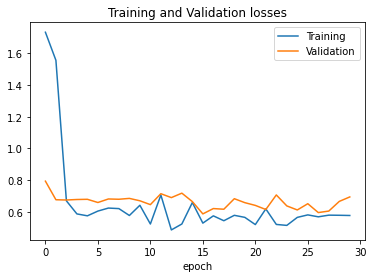

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')

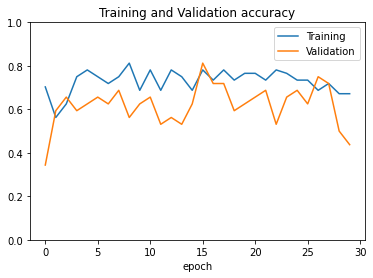

In [ ]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation accuracy')
plt.xlabel('epoch')
plt.ylim(0, 1);